<a href="https://colab.research.google.com/github/Mizoroki-Heck/Statistics/blob/main/Time_series/%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B(%D0%BF%D0%BE%D0%B8%D1%81%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5_%D0%B7%D0%B0%D0%BF%D1%80%D0%BE%D1%81%D1%8B).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/sample_data/Поисковые системы в России - по датам 2015-01-01-2019-12-01.csv',)

In [ ]:
data['Время'][0]

'2015-01-01 - 2015-01-01'

In [ ]:
data = data.drop(['Rambler, Визиты', 'Rambler, Доля', 'Mail.ru, Визиты', 'Mail.ru, Доля', 'Google, Визиты', 'Google, Доля', 'Яндекс, Доля', 'Остальные, Визиты', 'Остальные, Доля'], axis=1)
data

,Время,"Яндекс, Визиты"
0,2015-01-01 - 2015-01-01,67054003
1,2015-01-02 - 2015-01-02,85701308
2,2015-01-03 - 2015-01-03,91585678
3,2015-01-04 - 2015-01-04,94632940
4,2015-01-05 - 2015-01-05,97029139
...,...,...
1791,2019-11-27 - 2019-11-27,187331090
1792,2019-11-28 - 2019-11-28,185336946
1793,2019-11-29 - 2019-11-29,173040652
1794,2019-11-30 - 2019-11-30,150539309


In [ ]:
data.isna().sum()

Время             0
Яндекс, Визиты    0
dtype: int64

Думаю, стоит заменить запись вида 2015-01-01 - 2015-01-01, на 2015-01-01


In [ ]:
for i in range(len(data['Время'])):
  data['Время'][i] = data['Время'][i][:10]
data

<ipython-input-188-11e2ecb73aa2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Время'][i] = data['Время'][i][:10]


,Время,"Яндекс, Визиты"
0,2015-01-01,67054003
1,2015-01-02,85701308
2,2015-01-03,91585678
3,2015-01-04,94632940
4,2015-01-05,97029139
...,...,...
1791,2019-11-27,187331090
1792,2019-11-28,185336946
1793,2019-11-29,173040652
1794,2019-11-30,150539309


<Axes: >

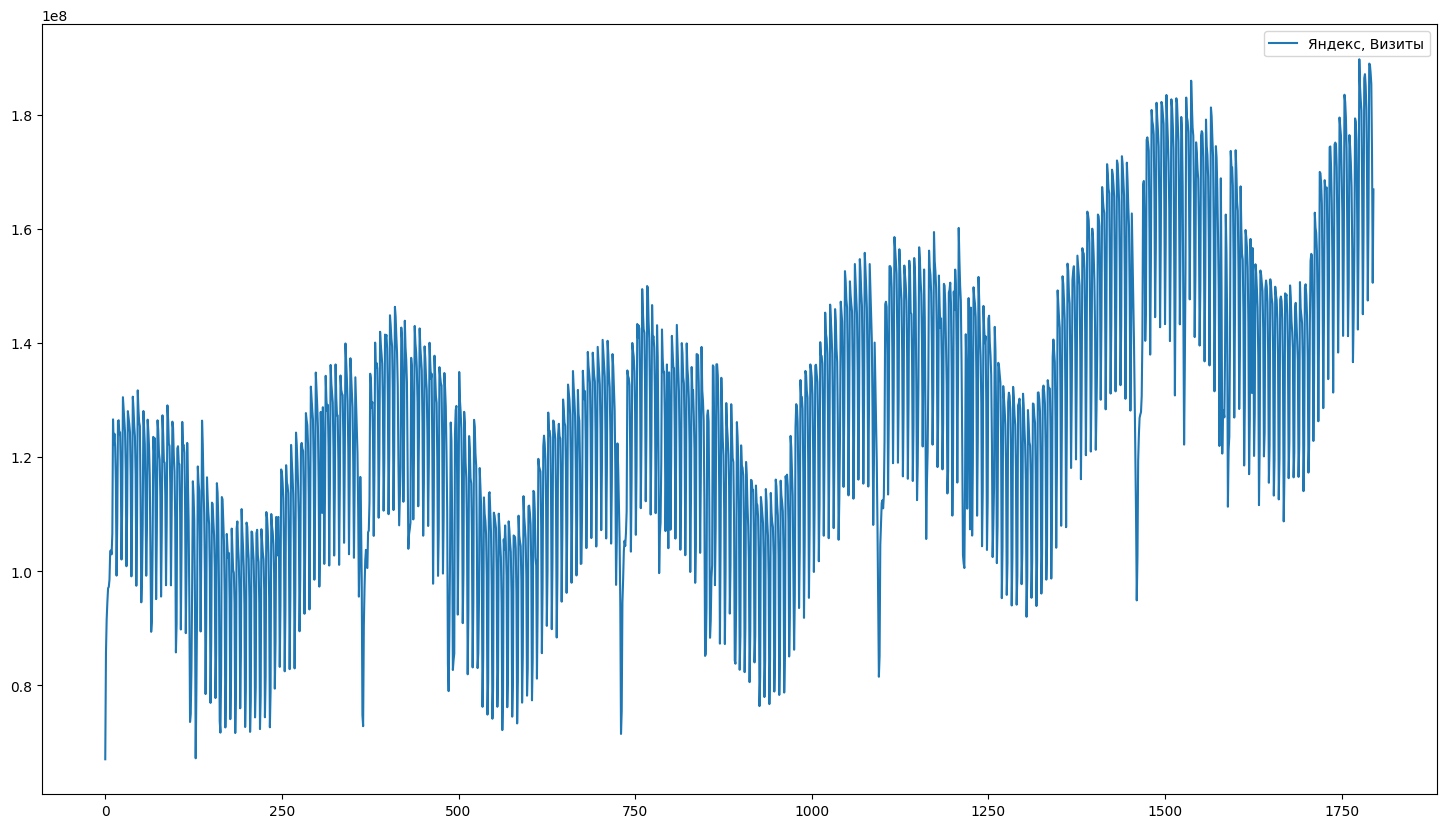

In [ ]:
data.plot(figsize=(18,10))

In [ ]:
data['Время'] = pd.to_datetime(data['Время'])

Стоит посмотреть на автокорелляцию

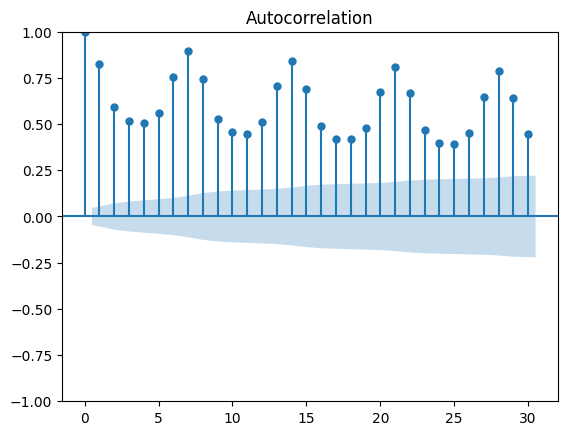

[1.         0.82497622 0.59277674 0.51430664 0.50481155 0.56027964
 0.75713855 0.89605406 0.74139951 0.52793486 0.45536471 0.4486591
 0.50855111 0.70429997 0.84044374 0.69077182 0.48719746 0.42045404
 0.41812746 0.47810655 0.67236785 0.80968874 0.66561299 0.46595958
 0.39883894 0.39410916 0.45275885 0.64736161 0.78642818 0.64380708
 0.4467038  0.38171557 0.37948949]


In [ ]:
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_acf(data['Яндекс, Визиты'], lags=30)
plt.show()
print(sm.tsa.acf(data['Яндекс, Визиты']))

Проверим на стационарность, я использовал критерий Дики — Фуллера

In [ ]:
from statsmodels.tsa.stattools import adfuller
test = adfuller(data['Яндекс, Визиты'])
print('adf: ', test[0])
print('p-values: ', test[1])
print('Critical_values: ', test[4])
if test[0] > test[4]['5%']:
  print('есть единичные корни, ряд не стационарен')
else:
   print('единичных корней нет, ряд стационарен')

adf:  -1.7335240137680659
p-values:  0.4139278892143743
Critical_values:  {'1%': -3.4340457100503534, '5%': -2.8631724504188356, '10%': -2.5676390661481077}
есть единичные корни, ряд не стационарен
